---
25/06/2023

<img src="249 Analatica - Logo-19.png" alt="Logo" style="display: block; margin-left: auto; margin-right: auto; width: 200px;">

# <p style="text-align: center;"><span style="color:#0077D4;">249Analytica Company</span></p>

---

# <p style="text-align: center;"><span style="color:black![249 Analatica - Logo-19.png.png](attachment:49912ee0-3595-4bb0-af56-1862b0ce6c57.png);">Corn Diseases Detection Model</span></p>

---
# Introduction:

The purpose of this report is to present the results and evaluation of a Corn Disease Detection model. The model was developed to accurately classify grape plants as healthy or infected with specific diseases, including Gray_leaf_spot, Common_rust, and Northern_Leaf_Blight. The model was trained and evaluated using a dataset containing images of grape plants.

---
# Essential Libraries and Modules 

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow import keras
from tensorflow.keras import layers

---
# Data Preparation and Path Handling

In [3]:
data_dir = 'C:/Users/DELL/Documents/Datasets/Plant Diseases Dataset/corn'

# Create paths for infected and uninfected images
healthy_path = os.path.join(data_dir, 'Corn_(maize)___healthy')
Common_rust_path = os.path.join(data_dir, 'Corn_(maize)___Common_rust_')
Leaf_Blight_path = os.path.join(data_dir, 'Corn_(maize)___Northern_Leaf_Blight')
Gray_leaf_spot_path = os.path.join(data_dir, 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot')

# Read the images and create labels
healthy_images = [os.path.join(healthy_path, img) for img in os.listdir(healthy_path)]
Common_rust_images = [os.path.join(Common_rust_path, img) for img in os.listdir(Common_rust_path)]
Leaf_blight_images = [os.path.join(Leaf_Blight_path, img) for img in os.listdir(Leaf_Blight_path)]
Gray_leaf_images = [os.path.join(Gray_leaf_spot_path, img) for img in os.listdir(Gray_leaf_spot_path)]

# Create a dataframe to store image paths and labels
data = pd.DataFrame(
    {'image_path': healthy_images +
     Common_rust_images + 
     Leaf_blight_images+
     Gray_leaf_images,
    'label': ['Healthy'] * len(healthy_images) + 
     ['Infected: Common_rust'] * len(Common_rust_images) +
     ['Infected: Leaf_blight'] * len(Leaf_blight_images)+
     ['Infected: Gray_leaf'] * len(Gray_leaf_images)})

In [4]:
data

,image_path,label
0,C:/Users/DELL/Documents/Datasets/Plant Disease...,Healthy
1,C:/Users/DELL/Documents/Datasets/Plant Disease...,Healthy
2,C:/Users/DELL/Documents/Datasets/Plant Disease...,Healthy
3,C:/Users/DELL/Documents/Datasets/Plant Disease...,Healthy
4,C:/Users/DELL/Documents/Datasets/Plant Disease...,Healthy
...,...,...
7311,C:/Users/DELL/Documents/Datasets/Plant Disease...,Infected: Gray_leaf
7312,C:/Users/DELL/Documents/Datasets/Plant Disease...,Infected: Gray_leaf
7313,C:/Users/DELL/Documents/Datasets/Plant Disease...,Infected: Gray_leaf
7314,C:/Users/DELL/Documents/Datasets/Plant Disease...,Infected: Gray_leaf


In [5]:
# Split the data into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(
     data['image_path'], data['label'],
     test_size=0.1, random_state=42
)

---
# Data Loading and Preprocessing

In [6]:

# Load and preprocess training and testing images using ImageDataGenerator
image_generator = ImageDataGenerator(
    rescale=1./255, 
    shear_range=0.1, 
    zoom_range=0.1, 
    horizontal_flip=True   
)
# Load and preprocess training images
train_images = image_generator.flow_from_dataframe(
    dataframe=pd.DataFrame({'image_path': train_data, 'label': train_labels}),
    x_col='image_path', y_col='label',
    target_size=(64, 64), batch_size=64
)

# Load and preprocess testing images
test_images = image_generator.flow_from_dataframe(
    dataframe=pd.DataFrame({'image_path': test_data, 'label': test_labels}),
    x_col='image_path', y_col='label',
    target_size=(64, 64), batch_size=64
)

Found 6584 validated image filenames belonging to 4 classes.
Found 732 validated image filenames belonging to 4 classes.


---
# Building (CNN) Model

In [7]:
# Create a sequential model
model = Sequential()

# Add convolutional and pooling layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the feature maps
model.add(Flatten())

# Add fully connected layers
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Adjust the number of units in the output layer based on the number of classes
num_classes = 4
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
# Set early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Train the model
history = model.fit(
    train_images, epochs=30, 
    validation_data=test_images, 
    callbacks=[early_stopping]
)

Epoch 1/30
103/103 [==============================] - 40s 371ms/step - loss: 0.7157 - accuracy: 0.6681 - val_loss: 0.3283 - val_accuracy: 0.8456
Epoch 2/30
103/103 [==============================] - 38s 365ms/step - loss: 0.3580 - accuracy: 0.8495 - val_loss: 0.2440 - val_accuracy: 0.9344
Epoch 3/30
103/103 [==============================] - 37s 364ms/step - loss: 0.2325 - accuracy: 0.9122 - val_loss: 0.2321 - val_accuracy: 0.9221
Epoch 4/30
103/103 [==============================] - 37s 361ms/step - loss: 0.1703 - accuracy: 0.9388 - val_loss: 0.2406 - val_accuracy: 0.9303
Epoch 5/30
103/103 [==============================] - 37s 361ms/step - loss: 0.1835 - accuracy: 0.9405 - val_loss: 0.1730 - val_accuracy: 0.9508
Epoch 6/30
103/103 [==============================] - 38s 364ms/step - loss: 0.1365 - accuracy: 0.9526 - val_loss: 0.1605 - val_accuracy: 0.9522
Epoch 7/30
103/103 [==============================] - 38s 364ms/step - loss: 0.1304 - accuracy: 0.9561 - val_loss: 0.1475 - val_ac

---
# Test Accuracy and Plots

In [9]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(test_images)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

12/12 [==============================] - 2s 171ms/step - loss: 0.1508 - accuracy: 0.9454
Test Loss: 0.15078040957450867
Test Accuracy: 0.9453551769256592


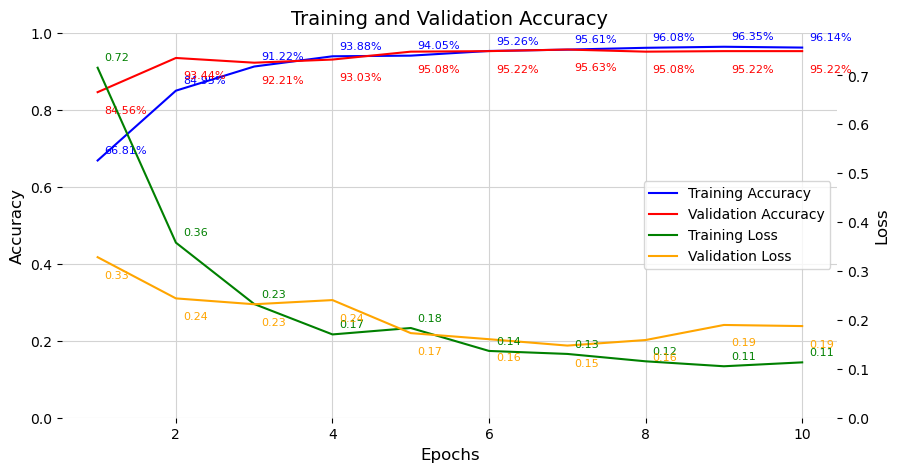

In [10]:
import matplotlib.pyplot as plt

# Extract accuracy and loss values from the training history
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Number of epochs
epochs = range(1, len(training_accuracy) + 1)

# Create the figure and axes for the plot
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot the trend line for training accuracy
ax1.plot(epochs, training_accuracy, 'b', label='Training Accuracy')

# Plot the trend line for validation accuracy
ax1.plot(epochs, validation_accuracy, 'r', label='Validation Accuracy')

# Set y-axis limits for accuracy
ax1.set_ylim([0, 1])

# Set plot title, x-axis label, and y-axis label for accuracy
ax1.set_title('Training and Validation Accuracy', fontsize=14)
ax1.set_xlabel('Epochs', fontsize=12)
ax1.set_ylabel('Accuracy', fontsize=12)

# Create a twin y-axis for loss
ax2 = ax1.twinx()

# Plot the trend line for training loss
ax2.plot(epochs, training_loss, 'green', label='Training Loss')

# Plot the trend line for validation loss
ax2.plot(epochs, validation_loss, 'orange', label='Validation Loss')

# Set y-axis limits for loss
ax2.set_ylim([0, max(training_loss + validation_loss) * 1.1])

# Set y-axis label for loss
ax2.set_ylabel('Loss', fontsize=12)

# Remove the frames of the plot
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(False)

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)

# Add gridlines
ax1.grid(color='lightgray', linestyle='-')

# Customize tick labels
ax1.tick_params(axis='both', which='major', labelsize=10)

# Add labels to the data points for accuracy
for i, acc in enumerate(training_accuracy):
    ax1.annotate(
        f'{round(acc*100, 2)}%', xy=(i+1, acc), xytext=(5, 5),
        textcoords='offset points', fontsize=8, color='b'
    )
    
for i, acc in enumerate(validation_accuracy):
    ax1.annotate(
        f'{round(acc*100, 2)}%', xy=(i+1, acc), xytext=(5, -15), 
        textcoords='offset points', fontsize=8, color='r'
    )

# Add labels to the data points for loss
for i, loss in enumerate(training_loss):
    ax2.annotate(
        f'{round(loss, 2)}', xy=(i+1, loss), xytext=(5, 5),
        textcoords='offset points', fontsize=8, color='green'
    )
    
for i, loss in enumerate(validation_loss):
    ax2.annotate(
        f'{round(loss, 2)}', xy=(i+1, loss), xytext=(5, -15), 
        textcoords='offset points', fontsize=8, color='orange'
    )

# Combine the legend for accuracy and loss and position it in the middle right
handles, labels = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(handles + handles2, labels + labels2, fontsize=10, loc='center right')

# Save the plot as an image
plt.savefig('Accuracy and Loss Trend_2.png', dpi=300)

# Display the plot
plt.show()

In [11]:
model.save('corn_disease_detection_model2.h5')